In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from backend.utils.helpers import decode_embedding_model_name_charts
from backend.utils.helpers import decode_llm_model_name

import seaborn as sns

In [26]:
results = pd.read_csv('result.csv')
results = results.drop(columns=["retriever_scores", "Unnamed: 14"])

In [27]:
# Compare between styles (4 graphs per metric)
# LLM + EMBED + SEARCH : 
# EMBED + SEARCH : precision, recall, f1

In [28]:
# Retriever Comparison
results['embedding_type'] = results['embedding_type'].apply(decode_embedding_model_name_charts)
retriever_results = results[['embedding_type', 'search_method','precision','recall', 'f1']].groupby(['embedding_type', 'search_method']).mean()

In [29]:
# Filter out rows where search_method is 'exact'
filtered_results = results[results['search_method'] == 'exact']
# Then, apply groupby and mean calculation
retriever_results = filtered_results[['embedding_type', 'search_method', 'precision', 'recall', 'f1']].groupby(['embedding_type', 'search_method']).mean()

#### Precision, Recall, and F1 mean scores by embedding model

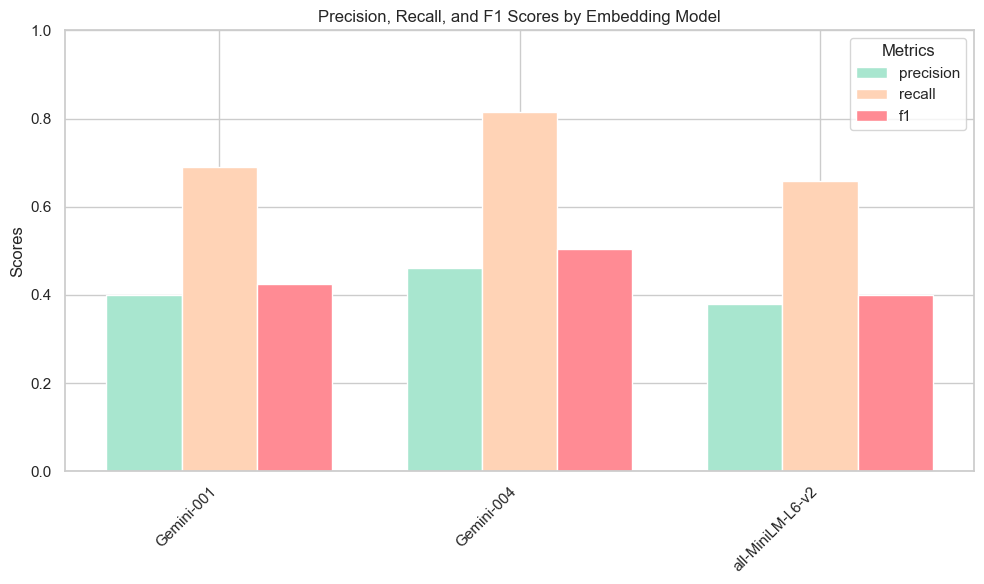

In [30]:
# Data preparation
metrics = ['precision', 'recall', 'f1']
index_labels = [f"{idx[0]}" for idx in retriever_results.index]
num_rows = len(retriever_results)
colors = ['#a8e6cf', '#ffd3b6', '#ff8b94']  # Define colors for each metric

# Create figure and bar width
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25  # Width of each sub-bar
x = np.arange(num_rows)  # Indices for groups

# Plot each metric
for i, (metric, color) in enumerate(zip(metrics, colors)):
    ax.bar(x + i * bar_width, retriever_results[metric], bar_width, label=metric, color=color)

# Labeling and formatting
ax.set_xticks(x + bar_width)  # Set position in the middle of each group
ax.set_xticklabels(index_labels, rotation=45, ha='right')
ax.set_ylabel("Scores")
ax.set_ylim(0, 1)
ax.legend(title="Metrics")
ax.set_title("Precision, Recall, and F1 Scores by Embedding Model")

plt.tight_layout()
plt.show()

#### Cosine Similarity, Correctness, and Faithfulness mean scores by style and LLM

In [31]:
# Model Comparison
models_results = results[['style', 'llm_name','cosine_similarity','correctness_score', 'faithfulness_score']].groupby(['style','llm_name']).mean()
models_results.to_csv('models_results.csv')
models_results.head(50)

cosine_similarity  \
style   llm_name                                                         
elderly gemini-1.5-flash                                      0.827369   
        meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo           0.766900   
        mistralai/Mistral-7B-Instruct-v0.1                    0.758425   
emoji   gemini-1.5-flash                                      0.722855   
        meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo           0.761841   
        mistralai/Mistral-7B-Instruct-v0.1                    0.692826   
kids    gemini-1.5-flash                                      0.737010   
        meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo           0.767190   
        mistralai/Mistral-7B-Instruct-v0.1                    0.747833   
neutral gemini-1.5-flash                                      0.816462   
        meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo           0.761129   
        mistralai/Mistral-7B-Instruct-v0.1                    0.766857   
rhymes  gemini-1.5-flash                                      0.644181   
        meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo           0.727933   
        mistralai/Mistral-7B-Instruct-v0.1                    0.710636   

                                                     correctness_score  \
style   llm_name                                                         
elderly gemini-1.5-flash                                      0.493845   
        meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo           0.473689   
        mistralai/Mistral-7B-Instruct-v0.1                    0.522253   
emoji   gemini-1.5-flash                                      0.416414   
        meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo           0.497697   
        mistralai/Mistral-7B-Instruct-v0.1                    0.517053   
kids    gemini-1.5-flash                                      0.420438   
        meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo           0.484897   
        mistralai/Mistral-7B-Instruct-v0.1                    0.509463   
neutral gemini-1.5-flash                                      0.470302   
        meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo           0.460654   
        mistralai/Mistral-7B-Instruct-v0.1                    0.502841   
rhymes  gemini-1.5-flash                                      0.346209   
        meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo           0.445885   
        mistralai/Mistral-7B-Instruct-v0.1                    0.440351   

                                                     faithfulness_score  
style   llm_name                                                         
elderly gemini-1.5-flash                                       0.702094  
        meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo            0.731438  
        mistralai/Mistral-7B-Instruct-v0.1                     0.831083  
emoji   gemini-1.5-flash                                       0.686971  
        meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo            0.752136  
        mistralai/Mistral-7B-Instruct-v0.1                     0.736851  
kids    gemini-1.5-flash                                       0.644512  
        meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo            0.705484  
        mistralai/Mistral-7B-Instruct-v0.1                     0.812762  
neutral gemini-1.5-flash                                       0.658818  
        meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo            0.690940  
        mistralai/Mistral-7B-Instruct-v0.1                     0.824009  
rhymes  gemini-1.5-flash                                       0.603984  
        meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo            0.724843  
        mistralai/Mistral-7B-Instruct-v0.1                     0.774221

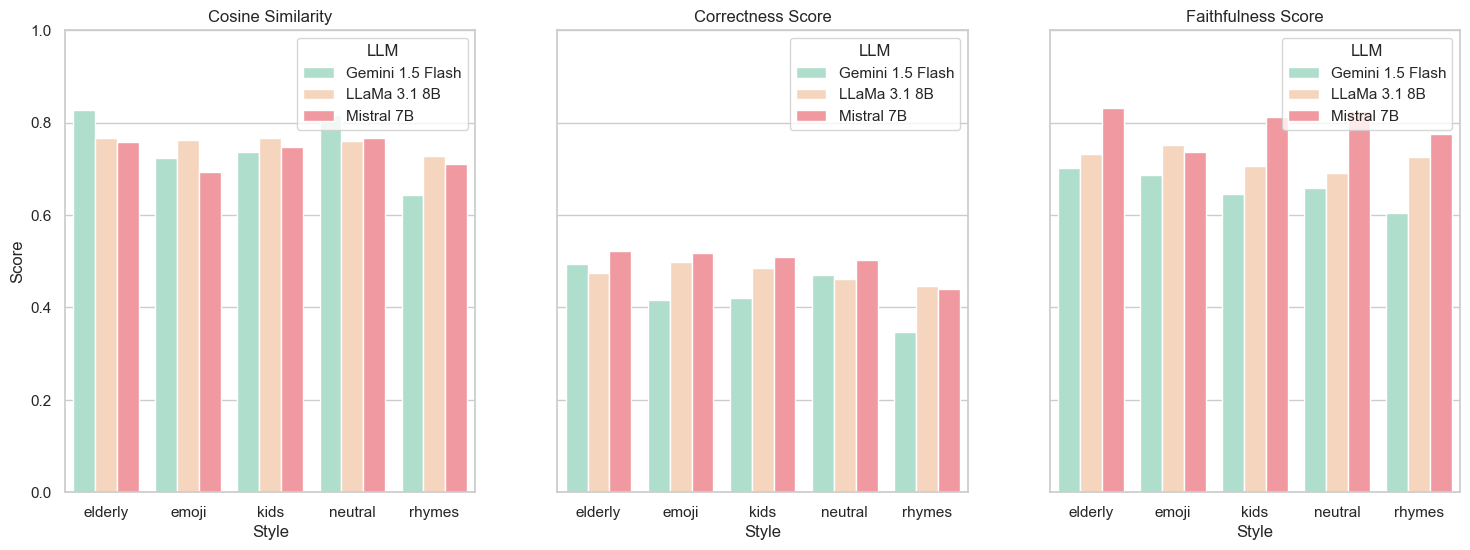

In [35]:
# Set style and color palette for clarity
sns.set(style="whitegrid")
colors = ['#a8e6cf', '#ffd3b6', '#ff8b94']

# Create subplots for each metric
metrics = ['cosine_similarity', 'correctness_score', 'faithfulness_score']
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Custom legend labels
custom_labels = ['Gemini 1.5 Flash', 'LLaMa 3.1 8B', 'Mistral 7B']

# Loop through each metric to create separate bar plots
for i, metric in enumerate(metrics):
    # Reset the index for easier plotting
    data = models_results[metric].unstack().reset_index()

    data.columns.name = None  # Remove MultiIndex naming

    # Melt the DataFrame to have 'style', 'llm_name', and 'score' columns for seaborn
    data_melted = data.melt(id_vars='style', var_name='llm_name', value_name='score')

    # Plot each metric as a subplot
    sns.barplot(
        data=data_melted,
        x='style',
        y='score',
        hue='llm_name',
        palette=colors,
        ax=axes[i]
    )

    # Set titles and labels
    axes[i].set_title(f'{metric.replace("_", " ").title()}')
    axes[i].set_xlabel('Style')
    axes[i].set_ylabel('Score' if i == 0 else '')
    axes[i].set_ylim(0, 1)

    # Adjust legend for each subplot
    handles, _ = axes[i].get_legend_handles_labels()
    axes[i].legend(handles=handles, labels=custom_labels, title='LLM', loc='upper right')

# Adjust layout
plt.show()
